# PHASE 2

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Cryotherapy.xlsx'
data = pd.read_excel(file_path)

# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to train, evaluate, and collect accuracy for different models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    return accuracy, class_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': SVC(kernel='linear'),
    'SVM (Polynomial)': SVC(kernel='poly'),
    'SVM (RBF)': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier()
}

results= []

# Part 1: Models with Feature Scaling
# -----------------------------------

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models with scaled features
accuracies_scaling = []
reports_scaling = []
for name, model in models.items():
    accuracy, report = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    accuracies_scaling.append(accuracy)
    reports_scaling.append(report)
    results.append({'Model': name, '': 'Accuracy With Scaling', 'Accuracy': accuracy})
    print(f'With Scaling - {name}: Accuracy = {accuracy}\n')
    
print("_"*200)
print("\n")


With Scaling - Logistic Regression: Accuracy = 0.8695652173913043

With Scaling - SVM (Linear): Accuracy = 0.8695652173913043

With Scaling - SVM (Polynomial): Accuracy = 0.7391304347826086

With Scaling - SVM (RBF): Accuracy = 0.9130434782608695

With Scaling - Decision Tree: Accuracy = 0.8260869565217391

With Scaling - Random Forest: Accuracy = 0.8260869565217391

With Scaling - AdaBoost: Accuracy = 0.8260869565217391

With Scaling - Gradient Boosting: Accuracy = 0.8260869565217391

________________________________________________________________________________________________________________________________________________________________________________________________________




Best parameters for SVM (Linear): {'C': 100}
Best cross-validation accuracy: 0.8956
Test set accuracy with best SVM (Linear) parameters: 0.8696

Best parameters for SVM (Poly): {'C': 10, 'degree': 3, 'gamma': 'scale'}
Best cross-validation accuracy: 0.8956
Test set accuracy with best SVM (Poly) parameters: 0.7826

Best parameters for SVM (RBF): {'C': 10, 'gamma': 0.1}
Best cross-validation accuracy: 0.9242
Test set accuracy with best SVM (RBF) parameters: 0.9130

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8495
Test set accuracy with best Decision Tree parameters: 0.8696

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.9560
Test set accuracy with best Random Forest parameters: 0.8261

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Best cross-

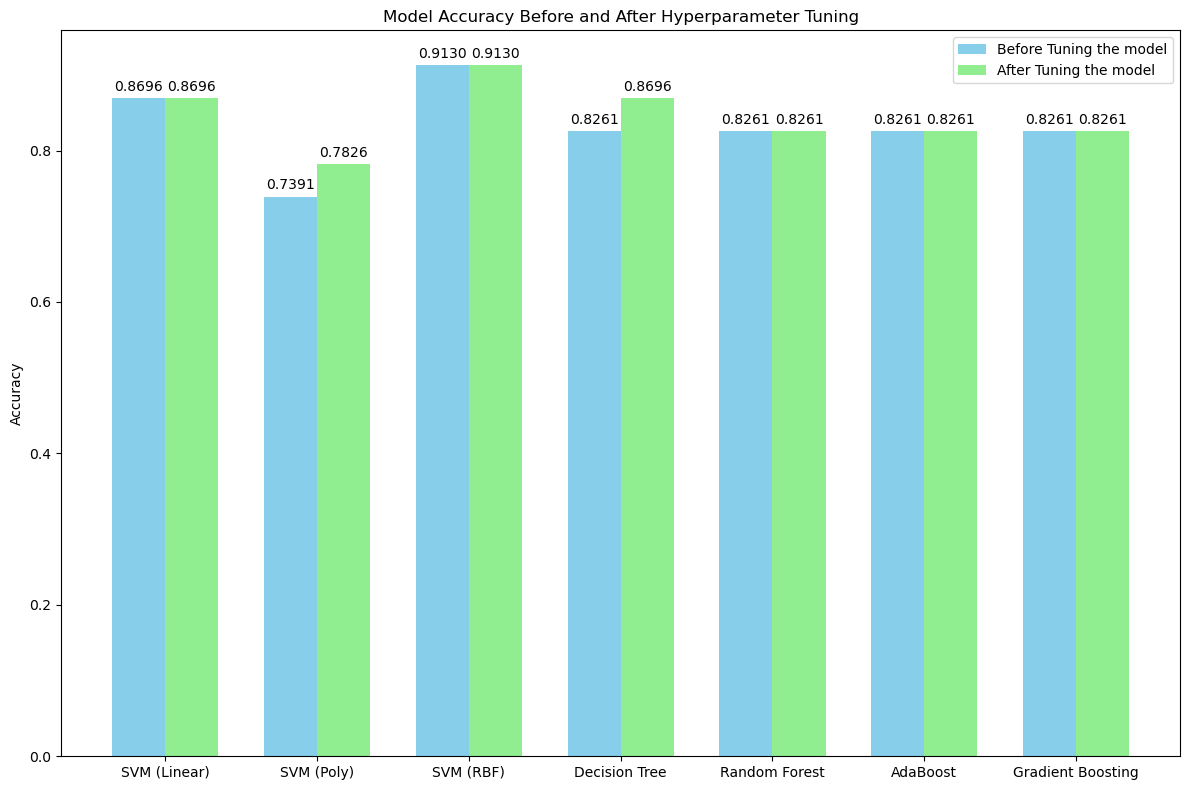

SVM (RBF) accuracy on PCA reduced data: 0.6957
Selected feature indices: [1 2 4]
SVM (RBF) accuracy on selected features: 0.8696


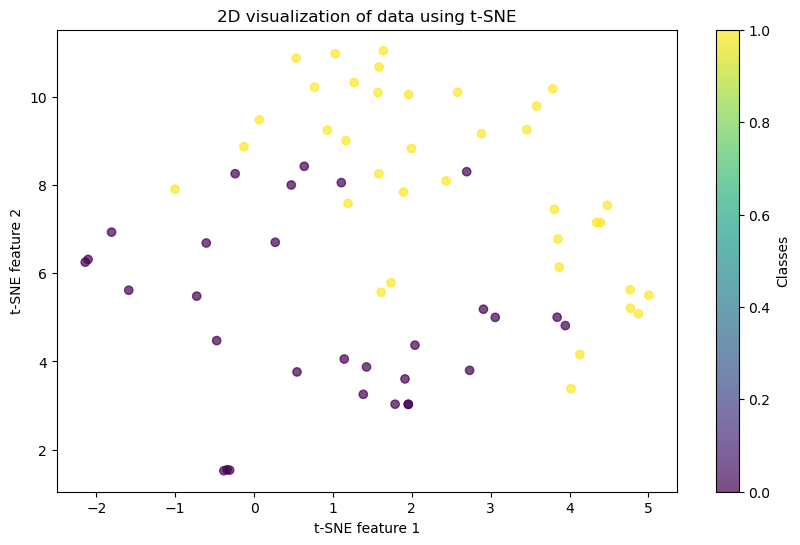

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# 5. Hyperparameter Tuning
# ------------------------
# 5.01 SVM with Linear Kernel
svm_linear_param_grid = {
    'C': [0.1, 1, 10, 100]
}

svm_linear = SVC(kernel='linear')
grid_svm_linear = GridSearchCV(svm_linear, svm_linear_param_grid, cv=5, scoring='accuracy')
grid_svm_linear.fit(X_train_scaled, y_train)
best_params_svm_linear = grid_svm_linear.best_params_
best_score_svm_linear = grid_svm_linear.best_score_
svm_linear_test_accuracy = accuracy_score(y_test, grid_svm_linear.predict(X_test_scaled))
print(f"Best parameters for SVM (Linear): {best_params_svm_linear}")
print(f"Best cross-validation accuracy: {best_score_svm_linear:.4f}")
print(f"Test set accuracy with best SVM (Linear) parameters: {svm_linear_test_accuracy:.4f}\n")

# 5.02 SVM with Polynomial Kernel
svm_poly_param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

svm_poly = SVC(kernel='poly')
grid_svm_poly = GridSearchCV(svm_poly, svm_poly_param_grid, cv=5, scoring='accuracy')
grid_svm_poly.fit(X_train_scaled, y_train)
best_params_svm_poly = grid_svm_poly.best_params_
best_score_svm_poly = grid_svm_poly.best_score_
svm_poly_test_accuracy = accuracy_score(y_test, grid_svm_poly.predict(X_test_scaled))
print(f"Best parameters for SVM (Poly): {best_params_svm_poly}")
print(f"Best cross-validation accuracy: {best_score_svm_poly:.4f}")
print(f"Test set accuracy with best SVM (Poly) parameters: {svm_poly_test_accuracy:.4f}\n")


# 5.1 SVM with RBF Kernel
svm_rbf_param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_rbf = SVC(kernel='rbf')
grid_svm_rbf = GridSearchCV(svm_rbf, svm_rbf_param_grid, cv=5, scoring='accuracy')
grid_svm_rbf.fit(X_train_scaled, y_train)
best_params_svm_rbf = grid_svm_rbf.best_params_
best_score_svm_rbf = grid_svm_rbf.best_score_
svm_rbf_test_accuracy = accuracy_score(y_test, grid_svm_rbf.predict(X_test_scaled))
print(f"Best parameters for SVM (RBF): {best_params_svm_rbf}")
print(f"Best cross-validation accuracy: {best_score_svm_rbf:.4f}")
print(f"Test set accuracy with best SVM (RBF) parameters: {svm_rbf_test_accuracy:.4f}\n")

# 5.2 Decision Trees
dt_param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()
grid_dt = GridSearchCV(decision_tree, dt_param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train_scaled, y_train)
best_params_dt = grid_dt.best_params_
best_score_dt = grid_dt.best_score_
dt_test_accuracy = accuracy_score(y_test, grid_dt.predict(X_test_scaled))
print(f"Best parameters for Decision Tree: {best_params_dt}")
print(f"Best cross-validation accuracy: {best_score_dt:.4f}")
print(f"Test set accuracy with best Decision Tree parameters: {dt_test_accuracy:.4f}\n")

# 5.3 Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_forest = RandomForestClassifier()
grid_rf = GridSearchCV(random_forest, rf_param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
rf_test_accuracy = accuracy_score(y_test, grid_rf.predict(X_test_scaled))
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validation accuracy: {best_score_rf:.4f}")
print(f"Test set accuracy with best Random Forest parameters: {rf_test_accuracy:.4f}\n")

# 5.4 AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
ada_boost = AdaBoostClassifier(algorithm='SAMME')
grid_ada = GridSearchCV(ada_boost, ada_param_grid, cv=5, scoring='accuracy')
grid_ada.fit(X_train_scaled, y_train)
best_params_ada = grid_ada.best_params_
best_score_ada = grid_ada.best_score_
ada_test_accuracy = accuracy_score(y_test, grid_ada.predict(X_test_scaled))
print(f"Best parameters for AdaBoost: {best_params_ada}")
print(f"Best cross-validation accuracy: {best_score_ada:.4f}")
print(f"Test set accuracy with best AdaBoost parameters: {ada_test_accuracy:.4f}\n")

# 5.5 Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7]
}
gradient_boosting = GradientBoostingClassifier()
grid_gb = GridSearchCV(gradient_boosting, gb_param_grid, cv=5, scoring='accuracy')
grid_gb.fit(X_train_scaled, y_train)
best_params_gb = grid_gb.best_params_
best_score_gb = grid_gb.best_score_
gb_test_accuracy = accuracy_score(y_test, grid_gb.predict(X_test_scaled))
print(f"Best parameters for Gradient Boosting: {best_params_gb}")
print(f"Best cross-validation accuracy: {best_score_gb:.4f}")
print(f"Test set accuracy with best Gradient Boosting parameters: {gb_test_accuracy:.4f}\n")

# 6. Results After Hyperparameter Tuning
results_tuned = {
    'Model': ['SVM (Linear)', 'SVM (Poly)', 'SVM (RBF)', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Before Tuning': [0.869565, 0.739130, 0.913043, 0.826087, 0.826087, 0.826087, 0.826087],
    'After Tuning': [svm_linear_test_accuracy, svm_poly_test_accuracy, svm_rbf_test_accuracy, dt_test_accuracy, rf_test_accuracy, ada_test_accuracy, gb_test_accuracy]
}

results_tuned_df = pd.DataFrame(results_tuned)

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(results_tuned['Model']))
width = 0.35

rects1 = ax.bar(x - width/2, results_tuned_df['Before Tuning'], width, label='Before Tuning the model', color='skyblue')
rects2 = ax.bar(x + width/2, results_tuned_df['After Tuning'], width, label='After Tuning the model', color='lightgreen')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Before and After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(results_tuned['Model'])
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# 7. Feature Reduction with PCA
pca = PCA(n_components=round(X_train_scaled.shape[1] / 2))
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_rbf_best = SVC(kernel='rbf', C=best_params_svm_rbf['C'], gamma=best_params_svm_rbf['gamma'])
svm_rbf_best.fit(X_train_pca, y_train)
svm_rbf_pca_accuracy = accuracy_score(y_test, svm_rbf_best.predict(X_test_pca))
print(f"SVM (RBF) accuracy on PCA reduced data: {svm_rbf_pca_accuracy:.4f}")

# 8. Feature Selection with SelectPercentile
selector = SelectPercentile(f_classif, percentile=50)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

svm_rbf_best.fit(X_train_selected, y_train)
svm_rbf_selected_accuracy = accuracy_score(y_test, svm_rbf_best.predict(X_test_selected))
print(f"SVM (RBF) accuracy on selected features: {svm_rbf_selected_accuracy:.4f}")

# 9. Data Visualization with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('2D visualization of data using t-SNE')
plt.colorbar(scatter, label='Classes')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


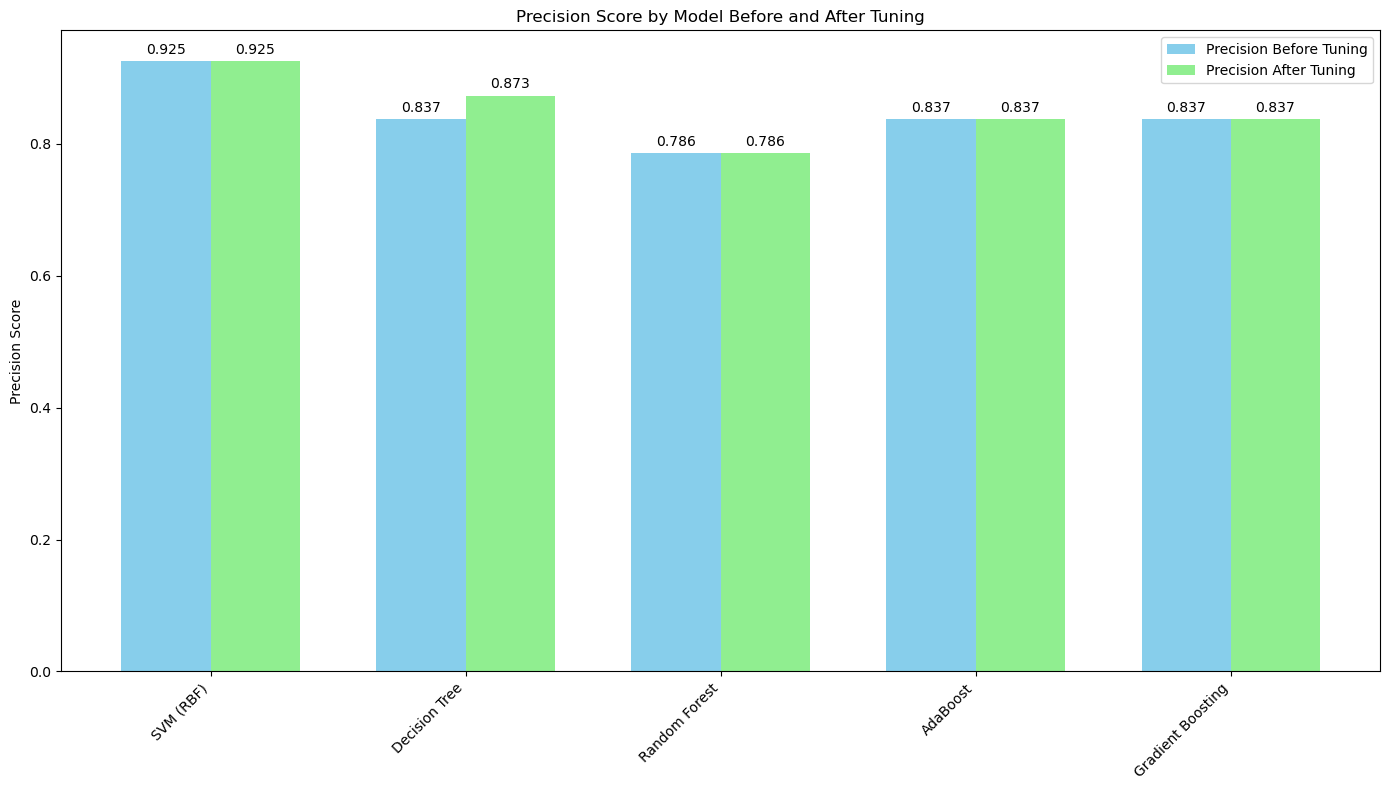

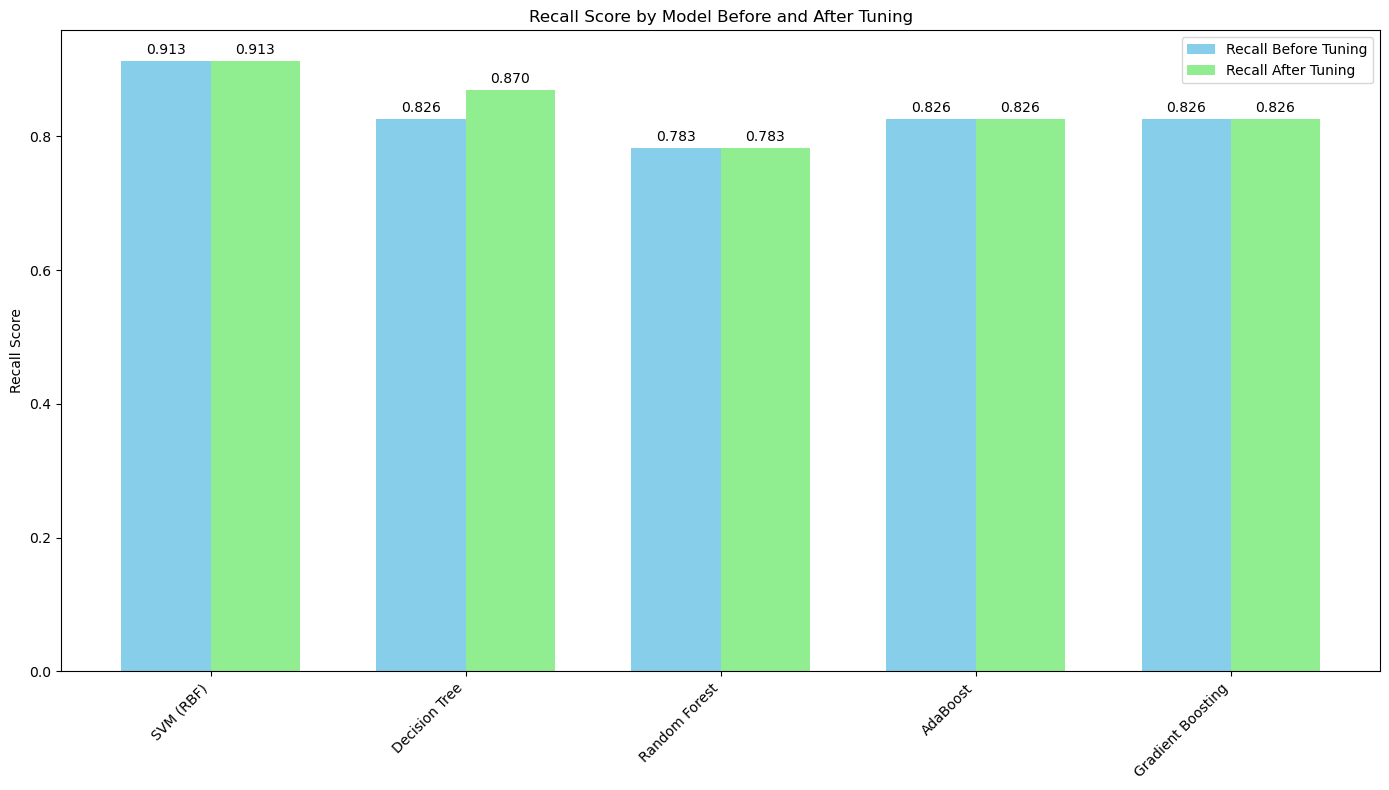

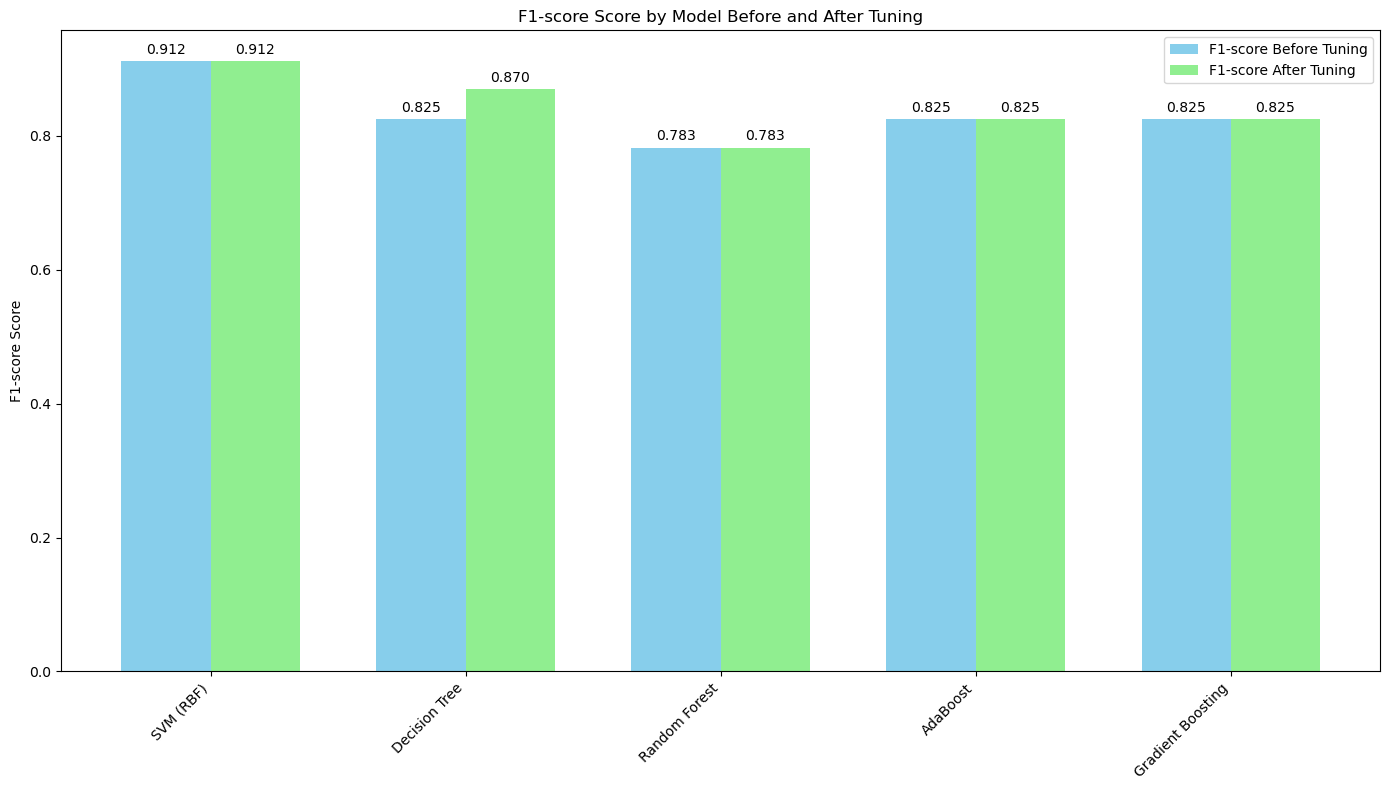

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'Cryotherapy.xlsx'
data = pd.read_excel(file_path)

# Separate features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Function to train, evaluate, and collect metrics for different models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    return accuracy, class_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': SVC(kernel='linear'),
    'SVM (Polynomial)': SVC(kernel='poly'),
    'SVM (RBF)': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models with scaled features
reports_scaling = {}
for name, model in models.items():
    _, report = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    reports_scaling[name] = report

# Hyperparameter Tuning
# ------------------------
# Define hyperparameter grids for tuning
param_grids = {
    'SVM (RBF)': {
        'C': [0.1, 1, 10, 100], 
        'gamma': [1, 0.1, 0.01, 0.001]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1],
        'max_depth': [3, 5, 7]
    }
}

# Tune models and evaluate
reports_tuned = {}
best_params = {}

for name, param_grid in param_grids.items():
    model = models[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_params[name] = grid_search.best_params_
    _, report = evaluate_model(grid_search.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)
    reports_tuned[name] = report

# Visualization of classification reports
# ---------------------------------------

# Define function to plot metrics
def plot_metrics(metric_name, baseline_reports, tuned_reports, model_names):
    baseline_scores = [baseline_reports[model]['weighted avg'][metric_name] for model in model_names]
    tuned_scores = [tuned_reports[model]['weighted avg'][metric_name] for model in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - width/2, baseline_scores, width, label=f'{metric_name.capitalize()} Before Tuning', color='skyblue')
    rects2 = ax.bar(x + width/2, tuned_scores, width, label=f'{metric_name.capitalize()} After Tuning', color='lightgreen')

    ax.set_ylabel(f'{metric_name.capitalize()} Score')
    ax.set_title(f'{metric_name.capitalize()} Score by Model Before and After Tuning')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

# List of models to visualize
model_names = list(param_grids.keys())

# Plot Precision
plot_metrics('precision', reports_scaling, reports_tuned, model_names)

# Plot Recall
plot_metrics('recall', reports_scaling, reports_tuned, model_names)

# Plot F1 Score
plot_metrics('f1-score', reports_scaling, reports_tuned, model_names)


